In [240]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import postprocess as pp
import os
# import plots

In [241]:
!ls "../../test/data"

prefix = "../../test/data"

banquise             mode_shapes_data.npz stability
cone                 solvers


In [242]:
# Load the saved data
loaded_data = np.load(os.path.join(prefix, 'mode_shapes_data.npz'), allow_pickle=True)

# Access the data from the loaded dictionary
time_steps = loaded_data['time_steps']
point_values = loaded_data['point_values'].item()  # Convert to a regular dictionary

In [249]:
import numpy as np

def find_closest_index(physical_time, time_data):
    # Extract the time values from the array
    discrete_times = time_data[:, 0]

    # Find the index of the closest discrete time
    closest_index = np.argmin(np.abs(discrete_times - physical_time))

    # Return the corresponding index value
    return time_data[closest_index, 1]


def read_mode_data_from_npz(npz_file, time_step,  num_points = -1, num_modes=1):
    """
    Read mode data for a given timestep and x_values from an npz file.

    Parameters:
    - npz_file (numpy.lib.npyio.NpzFile): The npz file containing mode shapes data.
    - time_step (int): The timestep to read.
    - num_modes (int): The number of modes.
    - num_points (int): The number of domain nodes.

    Returns:
    - mode_data (dict): A dictionary containing mode-specific fields for the given timestep.
    """
    mode_data = {}
    mode_data["x_values"] = npz_file["point_values"].item()["x_values"]
    if 'time_steps' not in npz_file or time_step not in npz_file['time_steps']:
        print(f"No data available for timestep {time_step}.")
        return None

    index = np.where(npz_file['time_steps'] == time_step)[0][0]

    for mode in range(1, num_modes + 1):
        mode_key = f'mode_{mode}'

        # print(f"{mode_key not in npz_file['point_values']}")
        
        if mode_key not in npz_file['point_values'].item():
            print(f"No data available for mode {mode} at timestep {time_step}.")
            continue

        fields = npz_file['point_values'].item()[mode_key]
        if 'bifurcation' not in fields or 'stability' not in fields:
            print(f"Incomplete data for mode {mode} at timestep {time_step}.")
            continue
        

        field_1_values = np.array(fields['bifurcation'][index])
        field_2_values = np.array(fields['stability'][index])

        # Assuming x_values is known or can be obtained
        x_values = np.linspace(0, 1, num_points)  # Replace with actual x_values
        
        mode_data["fields"] = {
            'bifurcation': {'x_values': x_values, 'values': field_1_values},
            'stability': {'x_values': x_values, 'values': field_2_values},
        }
        mode_data["time_step"] = time_step
        mode_data["lambda_bifurcation"] = np.nan
        mode_data["lambda_stability"] = np.nan
        
        # print(mode_data[mode_key])
    return mode_data


def plot_fields_for_time_step(mode_shapes_data):
    x_values = mode_shapes_data["x_values"]
    fields = mode_shapes_data["fields"]
    if 'bifurcation' in fields and 'stability' in fields:
        bifurcation_values = np.array(fields['bifurcation']['values'])
        stability_values = np.array(fields['stability']['values'])

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(x_values, bifurcation_values, label='Bifurcation Mode')
        plt.title(f'Bifurcation')

        plt.subplot(1, 2, 2)
        plt.plot(x_values, stability_values, label='Stability Mode')
        plt.title(f'Stability')

        plt.show()




In [246]:
# Load the saved data
prefix = "../../test/data"
loaded_data = np.load(os.path.join(prefix, 'mode_shapes_data.npz'), allow_pickle=True)


In [247]:
mode = read_mode_data_from_npz(loaded_data, time_step=1.01, num_modes=1, num_points=10)

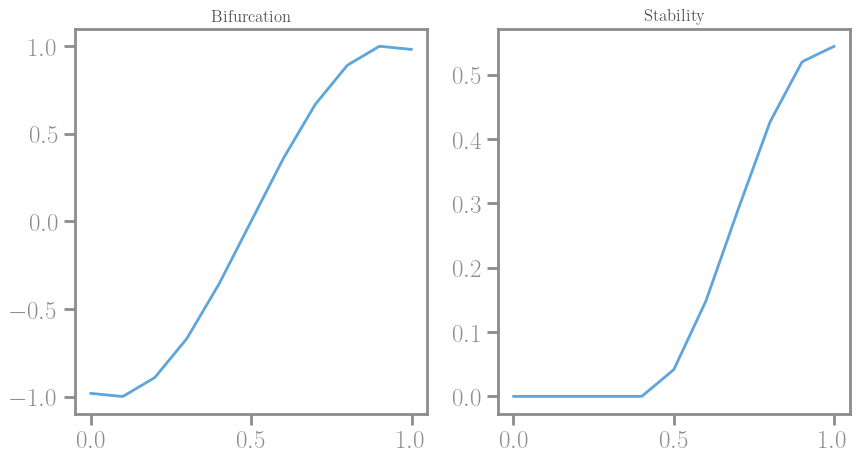

In [239]:
plot_fields_for_time_step(mode)

## 2D experiments
